In [1]:
from XRDXRFutils import DataSXRF, SpectraSXRF, FluorescenceSXRF
datadir = "/home/rosario/xmimsim/syntetic/Giulia_suited/outdata"
dsxrf_1024 = DataSXRF()
dsxrf_1024.set_nbins(1024)

In [2]:
%%time
synt_data_1024 = dsxrf_1024.read(datadir)

Reading SXRF data from /home/rosario/xmimsim/syntetic/Giulia_suited/outdata
CPU times: user 202 ms, sys: 61.2 ms, total: 264 ms
Wall time: 9.13 s


In [3]:
spectra_Giulia = synt_data_1024.spe_objs
#no Hg-As-Pb
spectra_Giulia = [s for s in spectra_Giulia if s.reflayer_atomic_num != [33, 80, 82]]

#no Hg-As
spectra_Giulia = [s for s in spectra_Giulia if s.reflayer_atomic_num != [33, 80]]

print(len(spectra_Giulia))
#Ba-Ti hc > 1.0e-04
spectra_Giulia = [s for s in spectra_Giulia if not (s.reflayer_atomic_num == [22, 56] and s.sublayer_thickness < 1.0e-04)]
print(len(spectra_Giulia))
#Co-Fe no hc > 0.0002
spectra_Giulia = [s for s in spectra_Giulia if not (s.reflayer_atomic_num == [26, 27] and s.sublayer_thickness > 0.0002)]
print(len(spectra_Giulia))
#Fe-Mn no hc > 0.001
spectra_Giulia = [s for s in spectra_Giulia if not (s.reflayer_atomic_num == [25, 26] and s.sublayer_thickness > 0.001)]
print(len(spectra_Giulia))

#time corrections
for i, s in enumerate(spectra_Giulia):
    #Cu-Zn t.c. 0.55
    if (s.reflayer_atomic_num == [29, 30]):
        s.time_correction(0.55)
    #Pb-As t.c. 0.65
    elif (s.reflayer_atomic_num == [33, 82]):
        s.time_correction(0.65)
    #Ca-K t.c. 0.75
    elif (s.reflayer_atomic_num == [19, 20]):
        s.time_correction(0.75)
    #K-Ca-Cd t.c. 1.7
    elif (s.reflayer_atomic_num == [19, 20, 48]):
        s.time_correction(1.7)
    #Cr-Mn t.c. 0.6
    elif (s.reflayer_atomic_num == [24, 25]):
        s.time_correction(0.6)
    spectra_Giulia[i] = s

synt_data_1024.spe_objs = spectra_Giulia

695
656
646
606


In [4]:
#other data
FeMn_sxrf = DataSXRF()
FeMn_sxrf.set_nbins(1024)
synt_FeMn = FeMn_sxrf.read('/home/rosario/xmimsim/syntetic/Giulia_suited/FeMn_more_less_time/outdata') #time c 7.8
PbS_sxrf = DataSXRF()
PbS_sxrf.set_nbins(1024)
synt_PbS = PbS_sxrf.read('/home/rosario/xmimsim/syntetic/test/PbS/outdata') #time corr 2.0
FeMn_good_sxrf = DataSXRF()
FeMn_good_sxrf.set_nbins(1024)
synt_FeMn_good = FeMn_good_sxrf.read('/home/rosario/xmimsim/syntetic/test/FeMn_good/outdata')
CuZn_sxrf = DataSXRF()
CuZn_sxrf.set_nbins(1024)
synt_CuZn = CuZn_sxrf.read('/home/rosario/xmimsim/syntetic/test/CuZn/outdata') #time corr 2
from_elgreco_sxrf = DataSXRF()
from_elgreco_sxrf.set_nbins(1024)
synt_from_elgreco = from_elgreco_sxrf.read('/home/rosario/xmimsim/syntetic/Giulia_suited/FromElGreco/outdata') #tc 0.15

Reading SXRF data from /home/rosario/xmimsim/syntetic/Giulia_suited/FeMn_more_less_time/outdata
Reading SXRF data from /home/rosario/xmimsim/syntetic/test/PbS/outdata
Reading SXRF data from /home/rosario/xmimsim/syntetic/test/FeMn_good/outdata
Reading SXRF data from /home/rosario/xmimsim/syntetic/test/CuZn/outdata
Reading SXRF data from /home/rosario/xmimsim/syntetic/Giulia_suited/FromElGreco/outdata


In [5]:
#generate datacubes and time corrections
import numpy as np
symbols = ["Pb", "Fe", "Mn", "Ca"]
lines = ["L", "K", "K", "K"]
synt_data_1024.get_data_and_labels(symbols, lines)

synt_FeMn.get_data_and_labels(symbols, lines)
#time corr
synt_FeMn.data = synt_FeMn.data * 7.8
synt_FeMn.labels = synt_FeMn.labels * 7.8

synt_PbS.get_data_and_labels(symbols, lines)
# time corr
synt_PbS.data = synt_PbS.data * 2.0
synt_PbS.labels = synt_PbS.labels * 2.0

synt_FeMn_good.get_data_and_labels(symbols, lines)
#time corr
synt_FeMn_good.data = synt_FeMn_good.data * 0.66 
synt_FeMn_good.labels = synt_FeMn_good.labels * 0.66

synt_CuZn.get_data_and_labels(symbols, lines)
#time corr
synt_CuZn.data = synt_CuZn.data * 2
synt_CuZn.labels = synt_CuZn.labels * 2

synt_from_elgreco.get_data_and_labels(symbols, lines)
#time corr
synt_from_elgreco.data = synt_from_elgreco.data * 0.15
synt_from_elgreco.labels = synt_from_elgreco.labels * 0.15

In [6]:
print(synt_CuZn.data.shape)
print(synt_data_1024.data.shape)
print(synt_FeMn.data.shape)
print(synt_FeMn_good.data.shape)
print(synt_PbS.data.shape)
print(synt_from_elgreco.shape)
datacube = np.concatenate((synt_CuZn.data,
                           synt_data_1024.data,
                           synt_FeMn.data,
                           synt_FeMn_good.data,
                           synt_PbS.data
))
print(datacube.shape)
datacube_labels = np.concatenate((synt_CuZn.labels,
                                  synt_data_1024.labels,
                                  synt_FeMn.labels,
                                  synt_FeMn_good.labels,
                                  synt_PbS.labels
))
print(datacube_labels.shape)
print("elgreco", synt_from_elgreco.data.shape)
print("elgreco", synt_from_elgreco.labels.shape)

(100, 1024)
(606, 1024)
(100, 1024)
(100, 1024)
(100, 1024)
(297, 1024)
(1006, 1024)
(1006, 4)
elgreco (297, 1024)
elgreco (297, 4)


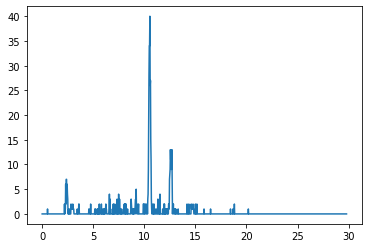

In [55]:
import matplotlib.pyplot as plt
def get_random2(counts):
    rounded = np.floor(counts)
    err = counts - rounded
    r = np.random.rand((counts.shape[0]))
    rounded += np.int32(r <= err)
    return np.random.poisson(rounded)

plt.figure(1)
plt.plot(synt_data_1024.energy, get_random2(datacube[220,:]))
plt.show()

In [8]:
#save datacube and labels
np.save("/home/rosario/xmimsim/syntetic/datacube_last.npy", datacube)
np.save("/home/rosario/xmimsim/syntetic/datacube_last_labels.npy", datacube_labels)
np.save("/home/rosario/xmimsim/syntetic/from_ElGreco.npy", synt_from_elgreco.data)
np.save("/home/rosario/xmimsim/syntetic/from_ElGreco_labels.npy", synt_from_elgreco.labels)

In [9]:
from XRDXRFutils import DataXRF,resample

from numpy import arange,linspace
from matplotlib.pyplot import plot,subplots,xlim,ylim,hlines,vlines,xlabel,ylabel,imshow,legend,vlines,savefig,semilogy

from scipy.interpolate import interp1d
from numpy import concatenate,append,array,diff,trapz,asarray,stack,log

from multiprocessing import Pool
import h5py
from PIL import Image

In [10]:
def read_tiff(files):
    x = []
    for file in files:
        img = Image.open(file)
        x += [asarray(img)]
    return asarray(x)

In [11]:
#np.save("/home/rosario/xmimsim/syntetic/datacube.npy", datacube)
#np.save("/home/rosario/xmimsim/syntetic/datacube_labels.npy", datacube_labels)
def _rebin(x,y):
    xx = x[::2]
    yp = y[:-1] + y[1:]
    yy = yp[::2]
    return xx, yy


In [13]:
import os
os.chdir('/home/rosario/Giulia_XRF/')
target_files = ('Pb-L.tiff','Fe-K.tiff','Mn-K.tiff','Ca-K.tiff')
targets = read_tiff(target_files)

In [14]:
data = DataXRF()

In [15]:
data.load_h5('xrf_1024.h5')

Loading: xrf_1024.h5


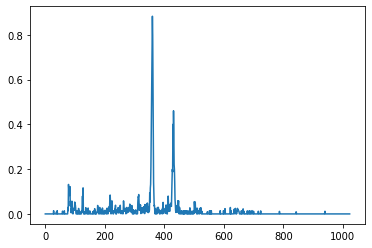

In [16]:
plot(data.data[100,100])

In [44]:
dcmax = datacube.max(axis = 1)
for i, s in enumerate(dcmax):
    if np.isnan(s):
        inan = i
print(inan)
dnan = datacube[inan,:]
dnan[np.isnan(dnan)] = 0
datacube[inan, :] = dnan
data.data = data.data.reshape(418*418, 1024)
data.data.shape

322


(174724, 1024)

In [43]:
dcmax = datacube.max(axis = 1)
synt_mean_counts = np.mean(dcmax)/2
xrf_mean_counts = np.mean(data.data.max(axis = 1))
print(synt_mean_counts)
print(xrf_mean_counts)
print(synt_mean_counts/xrf_mean_counts)

24.300847383300198
0.7904848491077763
30.74169911128426
